In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
dfx = pd.read_csv('data/xdata.csv')
dfy = pd.read_csv('data/ydata.csv')

In [5]:
dfx

,0,3.4821055700010444,2.4203917879404533
0,1,3.516279,3.719750
1,2,4.606496,3.414379
2,3,4.677011,3.047244
3,4,4.157725,3.138677
4,5,3.154431,3.619858
...,...,...,...
394,395,1.389231,2.592584
395,396,-0.352768,0.136461
396,397,0.789626,0.931670
397,398,-1.002530,-0.676162


In [11]:
X = dfx.values
y = dfy.values

print(X.shape)
print(y.shape)

(399, 3)
(399, 2)


In [12]:
X = X[:, 1:]
y = y[:, 1:].reshape((-1,))

print(X.shape)
print(y.shape)

(399, 2)
(399,)


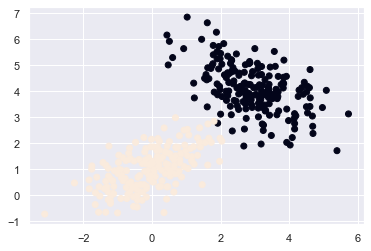

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [122]:
query_x = np.array([1, 6])
query_x

array([1, 6])

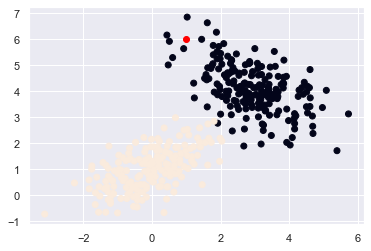

In [123]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(query_x[0], query_x[1], color="red")
plt.show()

# KNN from Scratch

In [124]:
# Euclidian dist

def dist(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))

def knn(X, Y, queryPoint, k=5):
    # Empty list
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        # calculate distance and assign it to d
        d = dist(queryPoint, X[i])
        
        # add dist and corresponding label to list
        vals.append((d, Y[i]))
    
    # Sort the list
    vals = sorted(vals)
    
    # pick first k values
    vals = vals[:k]
        
    # Convert list to numpy array to perform easy operations
    vals = np.array(vals)
    
    # new_vals will contain two tuples, first tuple is unique values in Y (0 $ 1)
    # and second tuple will contain counts of zeros and ones
    new_vals = np.unique(vals[:, 1], return_counts=True)
    
    # index having max counts
    max_freq_index = new_vals[1].argmax()
    
    # prediction eighter 0 or 1
    pred = new_vals[0][max_freq_index]
        
    return pred

In [125]:
pred = knn(X, y, [1, 6])

pred

0.0